In [4]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 채권 데이터 LOAD

In [28]:
bond=pd.read_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/회사채중복제거.csv")

In [31]:
aaa=bond[bond['섹터']=='회사채AAA']

In [33]:
aaa['만기구분'].value_counts()

4년~5년       5077
3년~4년       5077
2년6개월~3년    5077
1년~1년6개월    5077
1년6개월~2년    5052
2년~2년6개월    5043
9개월~1년      4969
3개월~6개월     4925
6개월~9개월     4917
5년~7년       4708
7년~10년      4700
10년~20년     3113
20년 초과      2323
전체             1
Name: 만기구분, dtype: int64

In [42]:
단기채=aaa[aaa['만기구분']=='3개월~6개월']
중기채=aaa[aaa['만기구분']=='2년6개월~3년']

In [49]:
단기채=단기채[['거래일','총수익률(%)']]
중기채=중기채[['거래일','총수익률(%)']]

In [54]:
df=pd.merge(단기채,중기채,on='거래일',how='outer')
df=df.dropna()

In [57]:
df.columns=['거래일', '단기채', '중기채']

In [74]:
df3=df.copy()

In [60]:
df3

,거래일,단기채,중기채
0,2002-01-02,-0.011153,-0.341021
1,2002-01-03,0.015304,0.025736
2,2002-01-04,0.032560,0.086522
3,2002-01-05,0.015154,0.024225
4,2002-01-07,0.041530,0.136422
...,...,...,...
4920,2022-05-03,0.003249,-0.097302
4921,2022-05-04,0.008386,-0.086353
4922,2022-05-06,0.010941,0.100113
4923,2022-05-09,0.020193,0.214975


In [75]:
df3['단기채가격']=10000
df3['중기채가격']=10000

In [76]:
df3['단기채']=df3['단기채']*0.01
df3['중기채']=df3['중기채']*0.01

In [77]:
for i in range(1,4925):
    df3.iloc[i,3]=df3.iloc[i,1]*df3.iloc[i-1,3]+df3.iloc[i-1,3]
df3

,거래일,단기채,중기채,단기채가격,중기채가격
0,2002-01-02,-0.000112,-0.003410,10000.000000,10000
1,2002-01-03,0.000153,0.000257,10001.530438,10000
2,2002-01-04,0.000326,0.000865,10004.786890,10000
3,2002-01-05,0.000152,0.000242,10006.303023,10000
4,2002-01-07,0.000415,0.001364,10010.458601,10000
...,...,...,...,...,...
4920,2022-05-03,0.000032,-0.000973,18612.366783,10000
4921,2022-05-04,0.000084,-0.000864,18613.927663,10000
4922,2022-05-06,0.000109,0.001001,18615.964145,10000
4923,2022-05-09,0.000202,0.002150,18619.723215,10000


In [78]:
for i in range(1,4925):
    df3.iloc[i,4]=df3.iloc[i,2]*df3.iloc[i-1,4]+df3.iloc[i-1,4]
df3

,거래일,단기채,중기채,단기채가격,중기채가격
0,2002-01-02,-0.000112,-0.003410,10000.000000,10000.000000
1,2002-01-03,0.000153,0.000257,10001.530438,10002.573621
2,2002-01-04,0.000326,0.000865,10004.786890,10011.228076
3,2002-01-05,0.000152,0.000242,10006.303023,10013.653295
4,2002-01-07,0.000415,0.001364,10010.458601,10027.314125
...,...,...,...,...,...
4920,2022-05-03,0.000032,-0.000973,18612.366783,22695.275507
4921,2022-05-04,0.000084,-0.000864,18613.927663,22675.677548
4922,2022-05-06,0.000109,0.001001,18615.964145,22698.378788
4923,2022-05-09,0.000202,0.002150,18619.723215,22747.174718


In [79]:
df3['단기채로그']=pd.DataFrame(np.log(df3['단기채가격']) - np.log(df3['단기채가격'].shift(1)))
df3['중기채로그']=pd.DataFrame(np.log(df3['중기채가격']) - np.log(df3['중기채가격'].shift(1)))
df3

,거래일,단기채,중기채,단기채가격,중기채가격,단기채로그,중기채로그
0,2002-01-02,-0.000112,-0.003410,10000.000000,10000.000000,NaN,NaN
1,2002-01-03,0.000153,0.000257,10001.530438,10002.573621,0.000153,0.000257
2,2002-01-04,0.000326,0.000865,10004.786890,10011.228076,0.000326,0.000865
3,2002-01-05,0.000152,0.000242,10006.303023,10013.653295,0.000152,0.000242
4,2002-01-07,0.000415,0.001364,10010.458601,10027.314125,0.000415,0.001363
...,...,...,...,...,...,...,...
4920,2022-05-03,0.000032,-0.000973,18612.366783,22695.275507,0.000032,-0.000973
4921,2022-05-04,0.000084,-0.000864,18613.927663,22675.677548,0.000084,-0.000864
4922,2022-05-06,0.000109,0.001001,18615.964145,22698.378788,0.000109,0.001001
4923,2022-05-09,0.000202,0.002150,18619.723215,22747.174718,0.000202,0.002147


In [80]:
bonddf=df3[['거래일','단기채로그','중기채로그']]

# 대체투자 데이터 LOAD

In [6]:
ksp = yf.download('^KS11', start='2002-01-01')
iau = yf.download('IAU', start='2002-01-01')
dbc = yf.download('DBC', start='2002-01-01')
vnq = yf.download('VNQ', start='2002-01-01')
nsd = yf.download('NDAQ', start='2002-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
ksp.columns=['Open', 'High', 'Low', 'Close', 'ksp종가', 'Volume']
iau.columns=['Open', 'High', 'Low', 'Close', 'iau종가', 'Volume']
dbc.columns=['Open', 'High', 'Low', 'Close', 'dbc종가', 'Volume']
vnq.columns=['Open', 'High', 'Low', 'Close', 'vnq종가', 'Volume']
nsd.columns=['Open', 'High', 'Low', 'Close', 'nsd종가', 'Volume']

In [82]:
ksp=ksp.reset_index()
iau=iau.reset_index()
dbc=dbc.reset_index()
vnq=vnq.reset_index()
nsd=nsd.reset_index()

In [83]:
df=pd.merge(ksp,vnq,on='Date',how='outer')
df=pd.merge(df,dbc,on='Date',how='outer')
df=pd.merge(df,iau,on='Date',how='outer')
df=pd.merge(df,nsd,on='Date',how='outer')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Volume_x', 'Close_x', 'Open_x', 'High_x', 'Low_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
df2=df[['Date','ksp종가','iau종가','dbc종가','vnq종가','nsd종가']]
df2

,Date,ksp종가,iau종가,dbc종가,vnq종가,nsd종가
0,2002-01-02,724.950012,NaN,NaN,NaN,NaN
1,2002-01-03,727.659973,NaN,NaN,NaN,NaN
2,2002-01-04,747.719971,NaN,NaN,NaN,NaN
3,2002-01-07,751.479980,NaN,NaN,NaN,NaN
4,2002-01-08,734.760010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5266,2004-04-15,NaN,NaN,NaN,NaN,6.437173
5267,2004-05-05,NaN,NaN,NaN,NaN,6.521874
5268,2004-05-26,NaN,NaN,NaN,NaN,6.140723
5269,2004-09-27,NaN,NaN,NaN,NaN,5.124329


In [86]:
df2.to_excel("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/대체투자.xlsx",index=False) #엑셀로 nan가공

In [88]:
df2=pd.read_excel("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/대체투자.xlsx")

In [90]:
df2=df2.sort_values('Date')

In [92]:
df2=df2.fillna(method='ffill')

In [93]:
df2.columns

Index(['Date', 'ksp종가', 'iau종가', 'dbc종가', 'vnq종가', 'nsd종가'], dtype='object')

In [95]:
df2['ksp로그']=pd.DataFrame(np.log(df2['ksp종가']) - np.log(df2['ksp종가'].shift(1)))
df2['iau로그']=pd.DataFrame(np.log(df2['iau종가']) - np.log(df2['iau종가'].shift(1)))
df2['dbc로그']=pd.DataFrame(np.log(df2['dbc종가']) - np.log(df2['dbc종가'].shift(1)))
df2['vnq로그']=pd.DataFrame(np.log(df2['vnq종가']) - np.log(df2['vnq종가'].shift(1)))
df2['nsd로그']=pd.DataFrame(np.log(df2['nsd종가']) - np.log(df2['nsd종가'].shift(1)))
df2=df2.dropna()

In [97]:
df2.columns

Index(['Date', 'ksp종가', 'iau종가', 'dbc종가', 'vnq종가', 'nsd종가', 'ksp로그', 'iau로그',
       'dbc로그', 'vnq로그', 'nsd로그'],
      dtype='object')

In [98]:
stockdf=df2[['Date','ksp로그', 'iau로그',
       'dbc로그', 'vnq로그', 'nsd로그']]

In [101]:
bonddf.columns=['Date','단기채로그','중기채로그']

In [105]:
bonddf.Date=pd.to_datetime(bonddf.Date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [115]:
bonddf = bonddf.set_index('Date')

In [118]:
bonddf = bonddf.loc['2006-02-07':]

In [123]:
finaldf = pd.merge(bonddf, stockdf, on='Date', how='outer').sort_values('Date')
finaldf

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2006-02-07,0.000085,-0.000366,-0.007001,-0.039284,-0.029352,-0.007895,-0.038928
1,2006-02-08,0.000132,0.000654,-0.016109,0.004563,-0.004264,-0.004449,0.002936
2,2006-02-09,0.000194,0.002796,0.008106,0.024111,0.009358,0.004766,-0.016256
3,2006-02-10,0.000145,0.000141,0.010215,-0.024657,-0.018373,0.000950,-0.001491
4,2006-02-13,0.000438,0.000094,-0.010873,-0.021550,-0.015646,0.001424,-0.020350
...,...,...,...,...,...,...,...,...
4029,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217
4212,2022-05-05,NaN,NaN,0.000000,-0.004196,-0.005292,-0.027030,-0.033019
4030,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993
4031,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948


In [124]:
finaldf = finaldf.fillna(0)
finaldf

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그
0,2006-02-07,0.000085,-0.000366,-0.007001,-0.039284,-0.029352,-0.007895,-0.038928
1,2006-02-08,0.000132,0.000654,-0.016109,0.004563,-0.004264,-0.004449,0.002936
2,2006-02-09,0.000194,0.002796,0.008106,0.024111,0.009358,0.004766,-0.016256
3,2006-02-10,0.000145,0.000141,0.010215,-0.024657,-0.018373,0.000950,-0.001491
4,2006-02-13,0.000438,0.000094,-0.010873,-0.021550,-0.015646,0.001424,-0.020350
...,...,...,...,...,...,...,...,...
4029,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217
4212,2022-05-05,0.000000,0.000000,0.000000,-0.004196,-0.005292,-0.027030,-0.033019
4030,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993
4031,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948


In [126]:
finaldf=finaldf.set_index('Date')


단기채로그    0.000000
중기채로그    0.000000
ksp로그    0.000000
iau로그    0.001961
dbc로그   -0.002149
vnq로그    0.005808
nsd로그   -0.000493
Name: 2006-03-01 00:00:00, dtype: float64

In [133]:
finaldf['상승']=1

In [129]:
finaldf=finaldf.loc['2006-03-01':]
finaldf

,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,국면
Date,,,,,,,,
2006-03-01,0.000000,0.000000,0.000000,0.001961,-0.002149,0.005808,-0.000493,0
2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0
2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0
2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0
2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0
...,...,...,...,...,...,...,...,...
2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0
2022-05-05,0.000000,0.000000,0.000000,-0.004196,-0.005292,-0.027030,-0.033019,0
2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0


In [134]:
finaldf.loc['2006-03-01':'2006-09-29']['상승']=0
finaldf.loc['2007-11-01':'2008-12-31']['상승']=0
finaldf.loc['2010-02-01':'2012-02-29']['상승']=0
finaldf.loc['2013-10-01':'2014-08-29']['상승']=0
finaldf.loc['2015-06-01':'2015-09-30']['상승']=0
finaldf.loc['2016-02-01':'2016-04-29']['상승']=0
finaldf.loc['2017-07-03':'2019-11-29']['상승']=0
finaldf.loc['2020-04-01':'2020-06-30']['상승']=0
finaldf.loc['2021-09-01':'2022-05-10']['상승']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [148]:
finaldf.iau로그.describe()

count    4197.000000
mean        0.000271
std         0.018794
min        -0.676830
25%        -0.004863
50%         0.000000
75%         0.005989
max         0.697859
Name: iau로그, dtype: float64

In [150]:
finaldf[finaldf.iau로그>0.69]

,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승
Date,,,,,,,,
2021-05-05,0.0,0.0,0.0,0.697859,0.003799,-0.016729,0.000061,1


In [155]:
finaldf['iau로그'].loc['2021-05-05']=0.00471140239489642
finaldf['iau로그'].loc['2021-05-06']=0.0163173342579576

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


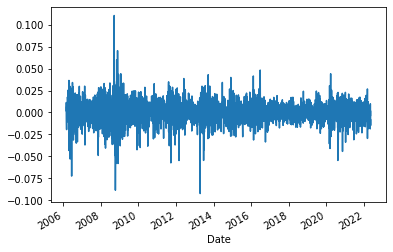

In [156]:
finaldf.iau로그.plot()

In [141]:
finaldf.head()

,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승
Date,,,,,,,,
2006-03-01,0.000000,0.000000,0.000000,0.001961,-0.002149,0.005808,-0.000493,0
2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0
2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0
2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0
2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0


In [170]:
ksp = yf.download('^KS11', start='2006-02-28',end='2022-05-10')

[*********************100%***********************]  1 of 1 completed


In [171]:
ksp=ksp.reset_index()
ksp=ksp[['Date','Adj Close']]

In [172]:
ksp

,Date,Adj Close
0,2006-02-28,1371.589966
1,2006-03-02,1367.699951
2,2006-03-03,1328.949951
3,2006-03-06,1344.760010
4,2006-03-07,1316.670044
...,...,...
3991,2022-05-02,2687.449951
3992,2022-05-03,2680.459961
3993,2022-05-04,2677.570068
3994,2022-05-06,2644.510010


In [169]:
finaldf=pd.merge(finaldf,ksp,on='Date',how='outer')
finaldf=finaldf.fillna(method='ffill')
finaldf

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,Adj Close
0,2006-03-01,0.000000,0.000000,0.000000,0.001961,-0.002149,0.005808,-0.000493,0,NaN
1,2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0,1367.699951
2,2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0,1328.949951
3,2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0,1344.760010
4,2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0,1316.670044
...,...,...,...,...,...,...,...,...,...,...
4192,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,2677.570068
4193,2022-05-05,0.000000,0.000000,0.000000,-0.004196,-0.005292,-0.027030,-0.033019,0,2677.570068
4194,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,2644.510010
4195,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948,0,2644.510010


In [174]:
finaldf['Adj Close']=finaldf['Adj Close'].fillna(1371.589966)
finaldf

,Date,단기채로그,중기채로그,ksp로그,iau로그,dbc로그,vnq로그,nsd로그,상승,Adj Close
0,2006-03-01,0.000000,0.000000,0.000000,0.001961,-0.002149,0.005808,-0.000493,0,1371.589966
1,2006-03-02,0.000263,-0.000102,-0.002840,0.011332,0.017911,-0.001220,-0.012176,0,1367.699951
2,2006-03-03,0.000105,0.000438,-0.028741,-0.007067,0.009256,-0.005508,0.017103,0,1328.949951
3,2006-03-06,0.000326,-0.000830,0.011826,-0.018973,-0.016041,0.017942,-0.018103,0,1344.760010
4,2006-03-07,0.000094,-0.000840,-0.021110,-0.005072,-0.017601,-0.012129,-0.043212,0,1316.670044
...,...,...,...,...,...,...,...,...,...,...
4192,2022-05-04,0.000084,-0.000864,-0.001079,0.009819,0.030728,0.011425,0.014217,0,2677.570068
4193,2022-05-05,0.000000,0.000000,0.000000,-0.004196,-0.005292,-0.027030,-0.033019,0,2677.570068
4194,2022-05-06,0.000109,0.001001,-0.012424,0.001961,0.001061,-0.011940,-0.016993,0,2644.510010
4195,2022-05-09,0.000202,0.002147,0.000000,-0.014940,-0.046284,-0.045043,-0.040948,0,2644.510010


In [177]:
finaldf.columns = ['Date', '단기채로그', '중기채로그', 'ksp로그', 'iau로그', 'dbc로그', 'vnq로그', 'nsd로그',
       '상승', '코스피']

In [180]:
finaldf.to_csv("/content/gdrive/My Drive/FINAL TEAM/파이널프로젝트/비주식팀/Data/최종데이터셋.csv",index=False)